<div class="alert alert-block alert-info">
__Name__: heidelburg_train_classifiers<br/>
__Description__: Assess and visualize FOX amr prediction performance in S. Heidelburg <br/>
__Author__: Matthew Whiteside matthew dot whiteside at canada dot ca<br/>
__Date__: Nov 6, 2017<br/>
__TODO__:<br/>
</div>

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn.metrics import f1_score, classification_report
import xgboost as xgb
import os
os.chdir('../pangenome')
import utils
import classify
import config

In [3]:
amr = joblib.load(config.SH['amr'])
amr_list = joblib.load(config.SH['amr_list'])
sample_index = joblib.load(config.SH['sample_index'])
pg = joblib.load(config.SH['pg'])
locus_list = joblib.load(config.SH['locus_list'])
test_train_index = joblib.load(config.SH['test_train_index'])
rfc = joblib.load(config.SH['fox_rfc'])
gbc = joblib.load(config.SH['fox_gbc'])
xbc = joblib.load(config.SH['fox_xbc'])

/home/matt/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
X_train = pg[test_train_index == 'Training',:].toarray()
X_test = pg[test_train_index == 'Validation',:].toarray()
y_train = amr[test_train_index == 'Training', amr_list == 'FOX']
y_test = amr[test_train_index == 'Validation', amr_list == 'FOX']

In [23]:
predictions = xbc.predict(X_test)
print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98        76
          1       0.93      1.00      0.96        41

avg / total       0.98      0.97      0.97       117



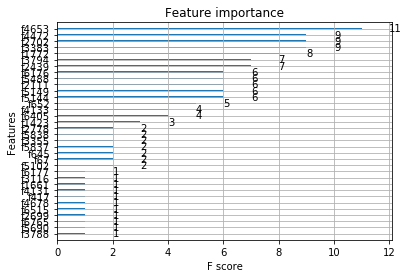

In [34]:
import matplotlib as plt
xgb.plot_importance(xbc)
plt.pyplot.show()

In [73]:

xbc._Booster.dump_model('trees.txt',  with_stats=True)

In [76]:
locus_list[np.array(xbc._Booster.feature_names) == 'f5144']

Index(['3018759497000'], dtype='object')

In [42]:
xbc

XGBClassifier(base_score=0.5, colsample_bylevel=0.7894391442444458,
       colsample_bytree=0.78352179013617, gamma=9.610003445771925e-05,
       learning_rate=0.29270135934576375, max_delta_step=0, max_depth=4,
       min_child_weight=3, missing=nan, n_estimators=2800, nthread=-1,
       objective='binary:logistic', reg_alpha=0.020848671174896537,
       reg_lambda=1.2692980895079784, scale_pos_weight=1, seed=3,
       silent=True, subsample=0.5967343497637643)

In [45]:
locus_list[4653]

'28678214872000'

In [46]:
locus_list[4652]

'28678214871000'